# KMeans algo for clustering train
# make prediction after clustering or, after model descovery and fitness computation
# pm4py

In [7]:
import pandas as pd
import time
import numpy as np
#from ClusteringPredictiveModel import ClusteringPredictiveModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from  matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from LastStateEncoder import LastStateEncoder

C:\Users\MSI\Miniconda3\envs\dl-challenge\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
data=pd.read_csv('BPIC 2017 just complete cases.csv',sep=';')

In [3]:
n_clusters = 4

In [10]:
#global case_id_col,event_col,timestamp_col,label_col,pos_label,numeric_cols,meta_event_data,other_col,variant_col

case_id_col = "Case ID"
event_col = "Activity"
timestamp_col = "Complete Timestamp"
label_col = 'lbl'
pos_label = 'A_Pending'
cat_cols = ['Resource','(case) LoanGoal','(case) ApplicationType'] 
numeric_cols = [ '(case) RequestedAmount',label_col]  
meta_event_data=["Complete Timestamp",'Start Timestamp','EventOrigin','OfferID','Unnamed: 0','Transition','milli_seconds',
          'EventID','lifecycle:transition','days','D_seconds',
          'Accepted', 'Selected' ,
          'FirstWithdrawalAmount', 'MonthlyCost', 'NumberOfTerms','outcome',
          'Variant', 'Action', 'CreditScore','OfferedAmount'
          ]
other_col= '(case) RequestedAmount'
variant_col='Variant index'

In [11]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data['Activity'] = lb_make.fit_transform(data['Activity'])

data.head() #Results in appending a new column to dfdata.drop(meta_event_data,axis=1,inplace=True)
#data.drop(variant_col,axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data['Activity'] = lb_make.fit_transform(data['Activity'])

data.head() #Results in appending a new column to df

Case ID  Activity Resource  Variant index  \
0  Application_652823628         4   User_1              2   
1  Application_652823628         8   User_1              2   
2  Application_652823628         3   User_1              2   
3  Application_652823628        21  User_17              2   
4  Application_652823628         0  User_52              2   

  (case) ApplicationType         (case) LoanGoal  (case) RequestedAmount  \
0             New credit  Existing loan takeover                 20000.0   
1             New credit  Existing loan takeover                 20000.0   
2             New credit  Existing loan takeover                 20000.0   
3             New credit  Existing loan takeover                 20000.0   
4             New credit  Existing loan takeover                 20000.0   

         lbl  
0  A_Pending  
1  A_Pending  
2  A_Pending  
3  A_Pending  
4  A_Pending

In [6]:
# divide into train and test data
np.random.seed(22)
sample_cases_KMeans = np.random.choice(data[case_id_col].unique(), 3000)
train_cases_KMeans, test_cases_KMeans = train_test_split(sample_cases_KMeans , train_size = 4.0/5, random_state = 22 )
train_KMeans = data[data[case_id_col].isin(train_cases_KMeans)]
test_KMeans = data[data[case_id_col].isin(test_cases_KMeans)]

C:\Users\MSI\Miniconda3\envs\ch\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
# fit model (cluster traces and build classifier for each cluster)
model_1 = ClusteringPredictiveModel(case_id_col, event_col, label_col, timestamp_col, cat_cols, numeric_cols, n_clusters=n_clusters, n_estimators=100, random_state=22, fillna=True)
model_1.fit(train_KMeans)

In [15]:
from pm4py.objects.log.adapters.pandas import csv_import_adapter
from pm4py.objects.conversion.log import factory as conversion_factory
dataframe = csv_import_adapter.import_dataframe_from_path('data/train_0.csv' ,sep=";")
#dataframe=pd.read_csv('data/train_0.csv' ,sep=";",index_col=[0])
#dataframe.index=dataframe['Unnamed: 0']
#dataframe.drop(['Unnamed: 0'],axis=1,inplace=True)
log = conversion_factory.apply(dataframe)

KeyError: 'case:concept:name'

In [27]:
# trim first n activity
#######################

n=12
n_events=test_KMeans.groupby(['Case ID']).apply(lambda x: x.head(n)).droplevel(1)


In [120]:
# events from '''''''  to '''''''
#if not: from_event=A_Create Application

from_event= 'A_Submitted'

to_event  = 'A_Accepted'

from_to=pd.DataFrame(columns=test_KMeans.columns)
#idx=dd[dd['Activity'].values==from_event].index
#idx2=dd[dd['Activity'].values==to_event].index  
#cd=test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))]

for i in test_cases_KMeans:
    dd=test_KMeans[test_KMeans['Case ID']==i]
    idx=dd[dd['Activity'].values==from_event].index
    if not idx.any():
        idx=dd[dd['Activity'].values=='A_Create Application'].index
    idx2=dd[dd['Activity'].values==to_event].index 
    from_to=from_to.append(test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))])

In [121]:
# events from '''''''  to '''''''
#if not: from_event=A_Create Application

from_event= 'A_Accepted'

to_event  = 'O_Sent (mail and online)'

#from_to=pd.DataFrame(columns=test_KMeans.columns)
#idx=dd[dd['Activity'].values==from_event].index
#idx2=dd[dd['Activity'].values==to_event].index  
#cd=test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))]

for i in test_cases_KMeans:
    dd=test_KMeans[test_KMeans['Case ID']==i]
    idx=dd[dd['Activity'].values==from_event].index+1
    if not idx.any():
        idx=dd[dd['Activity'].values=='A_Create Application'].index+1
    idx2=dd[dd['Activity'].values==to_event].index 
    if not idx2.any():
        idx2=dd[dd['Activity'].values=='O_Sent (online only)'].index
    if not idx2.any():
        idx2=dd[dd['Activity'].values=='O_Created'].index
    from_to=from_to.append(test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))])

In [122]:
# events from '''''''  to '''''''
#if not: from_event=A_Create Application

from_event= 'A_Validating'

to_event  = 'A_Pending'

#from_to=pd.DataFrame(columns=test_KMeans.columns)
#idx=dd[dd['Activity'].values==from_event].index
#idx2=dd[dd['Activity'].values==to_event].index  
#cd=test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))]

for i in test_cases_KMeans:
    dd=test_KMeans[test_KMeans['Case ID']==i]
    idx=dd[dd['Activity'].values==from_event].index
    if not idx.any():
        idx=dd[dd['Activity'].values=='W_Call after offers'].index
    if not idx.any():
        idx=dd[dd['Activity'].values=='W_Complete application'].index
        
    if not idx.any():
        idx=dd[dd['Activity'].values=='W_Shortened completion'].index    
    
    idx2=dd[dd['Activity'].values==to_event].index 
    if not idx2.any():
        idx2=dd[dd['Activity'].values=='A_Denied'].index
    if not idx2.any():
        idx2=dd[dd['Activity'].values=='A_Cancelled'].index
    if not (idx2.any()and idx.any()):
        continue
    if not idx2.any():
        idx2=[dd.index.max()]
    from_to=from_to.append(test_KMeans[test_KMeans.index.isin (range(idx[0],idx2[0]+1))])

In [28]:
n_events.index=range(0,len(n_events))

In [29]:
len(n_events)

65360

In [8]:
# predict for test set (assign each trace to the closest cluster and predict outcome using the corresponding classifier)
preds = model.predict_proba(test_KMeans )

  2  18  7  11  20  2


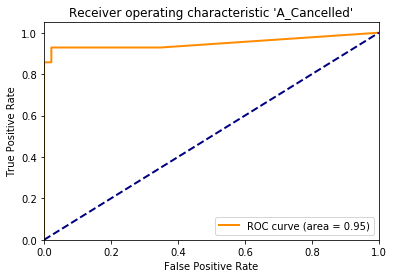

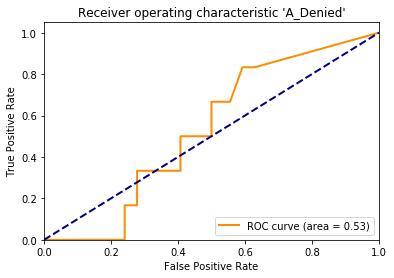

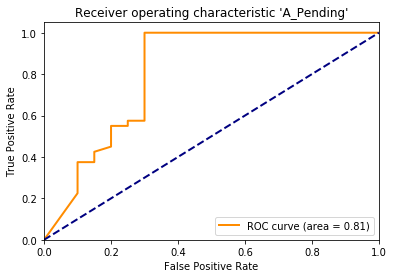

In [9]:
import sklearn.metrics as met
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
th=dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i],th[i] = met.roc_curve(model.actual[model.actual.columns.values[i+1]],preds[preds.columns.values[i+1]])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.figure()
    lw = i
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic %r' %model.actual.columns.values[i+1])
    plt.legend(loc="lower right")
    plt.show()

# Resalts

In [38]:
# KMeans start predicting the outcome correctely begining by n_events = 11 activities.

# KMeans doesn't able to predict the outcome when the request present the system fault from 'A_Submitted' to 'A_Accepted'.
# KMeans doesn't able to predict the outcome when the request present the system fault from 'A_Accepted' to O_Sent.
# KMeqns can predect outcome in an acceptable rate when the request present the system fault from'A_Validating' to desision.

# KMeans shows a good rate to estimate outcome by feading model in a system delay activities.

# More the activities in the trace, more prediction precies since the clustering depends on activities weights

# 81% avg correct prediction by three classes for test data AP=230 AD=230 AC=230 tot=960


# End,

In [39]:
model.actual[0:1]

Case ID  A_Cancelled  A_Denied  A_Pending
0  Application_821425679            0         0          1

In [40]:
preds[0:1]

Case ID  A_Cancelled  A_Denied  A_Pending
0  Application_1004303396          0.0       0.0        1.0

In [55]:
h='A_Denied'
uc=test_KMeans[test_KMeans['lbl']==h]['Case ID'].unique()
AD=test_KMeans[test_KMeans['Case ID'].isin(uc)][0:230]
h='A_Cancelled'
uc=test_KMeans[test_KMeans['lbl']==h]['Case ID'].unique()
AC=test_KMeans[test_KMeans['Case ID'].isin(uc)][0:230]
h='A_Pending'
uc=test_KMeans[test_KMeans['lbl']==h]['Case ID'].unique()
AP=test_KMeans[test_KMeans['Case ID'].isin(uc)][0:230]
AC=pd.concat([AC,AP],axis=0)
AC=pd.concat([AC,AD],axis=0)

# model discovery

In [1]:
import os
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.evaluation.replay_fitness import factory as replay_factory
from pm4py.algo.conformance.alignments import factory as align_factory
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory
from pm4py.visualization.petrinet import factory as pn_vis_factory

C:\Users\MSI\Miniconda3\envs\dl-challenge\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


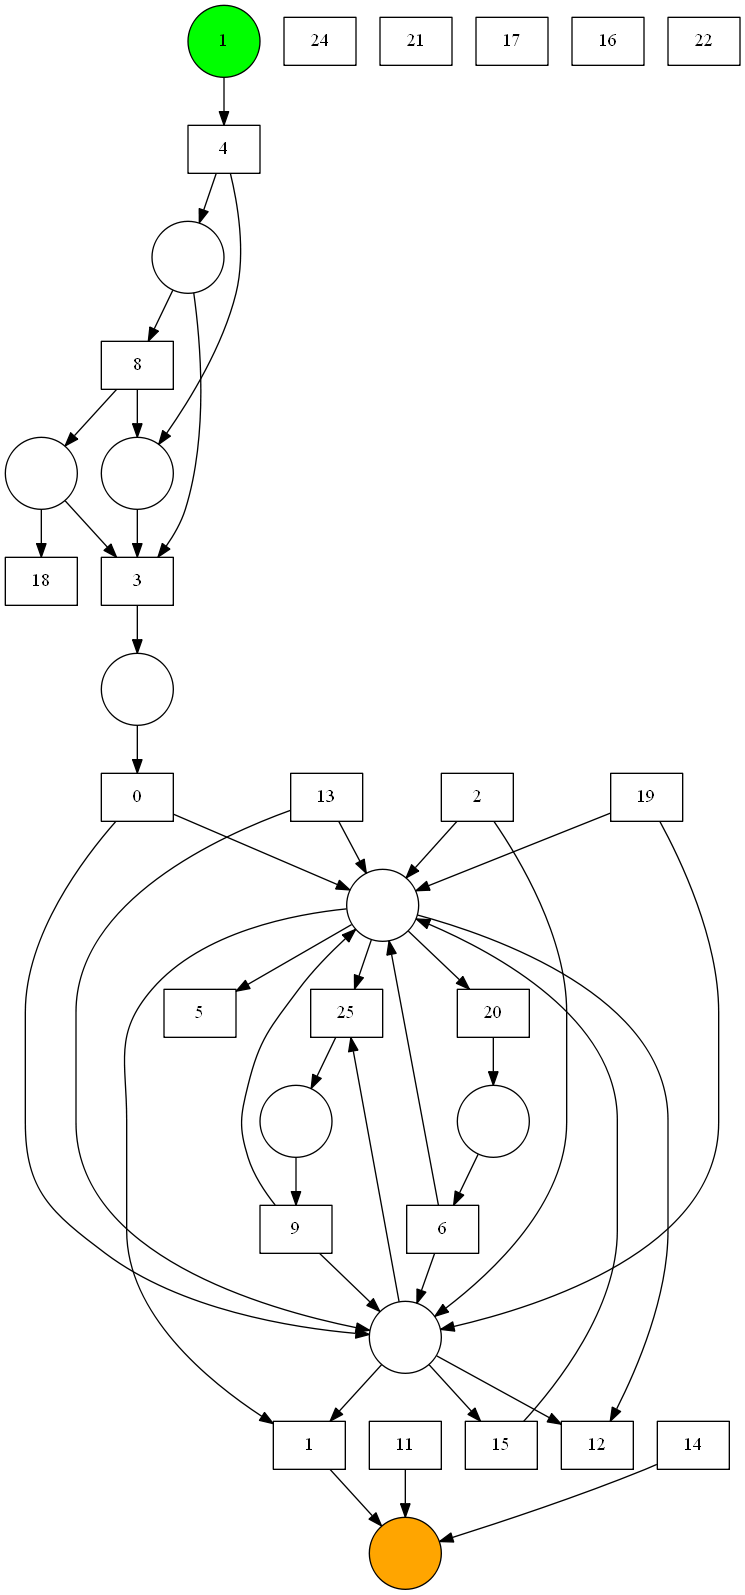

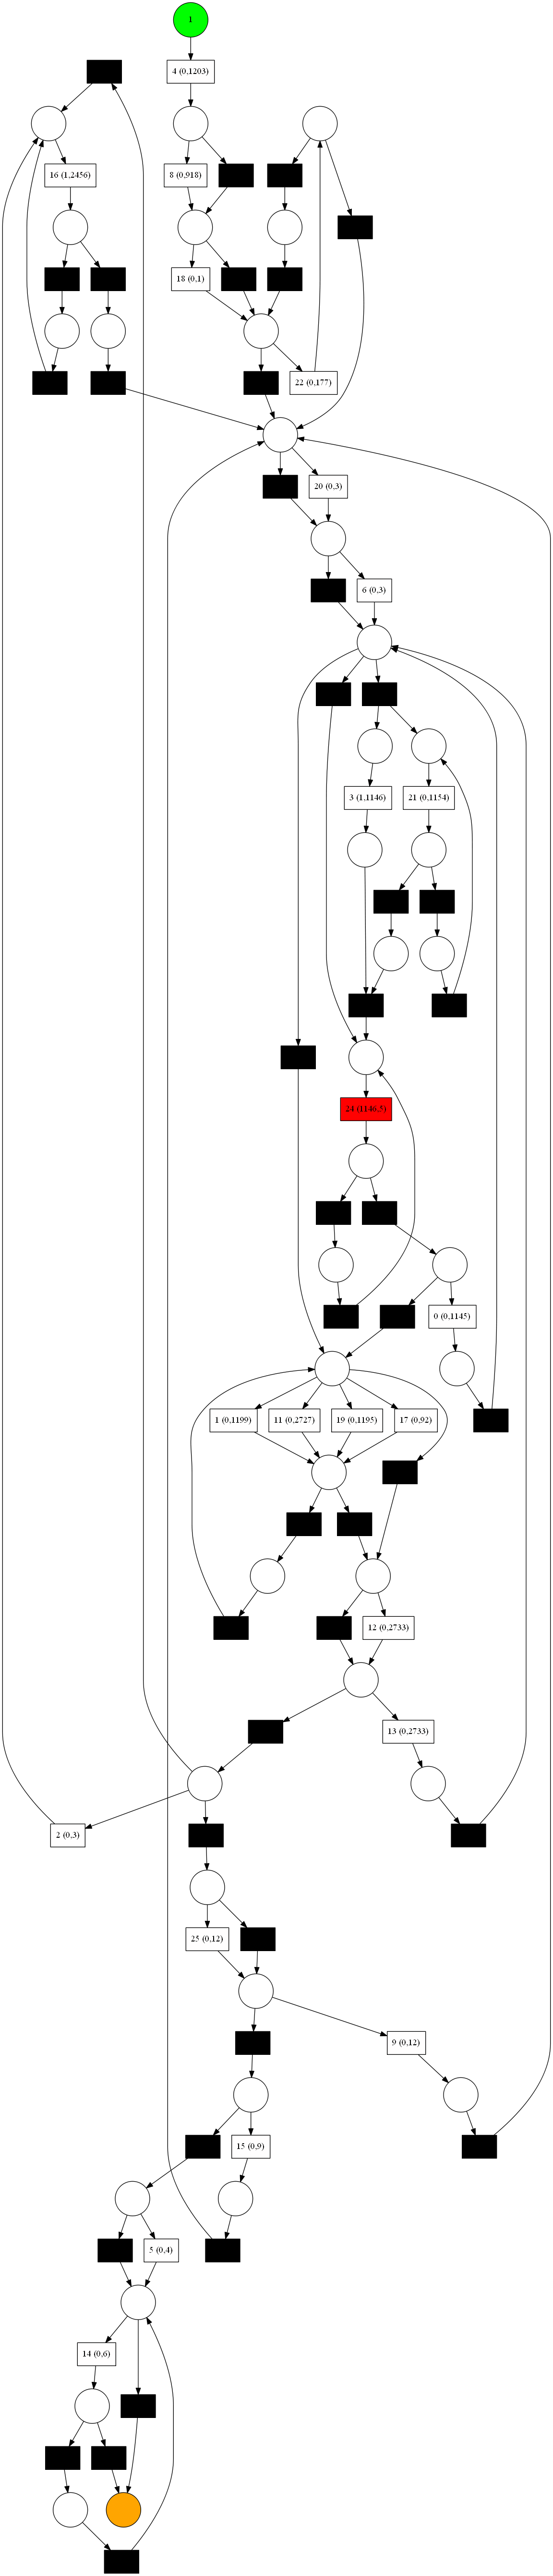

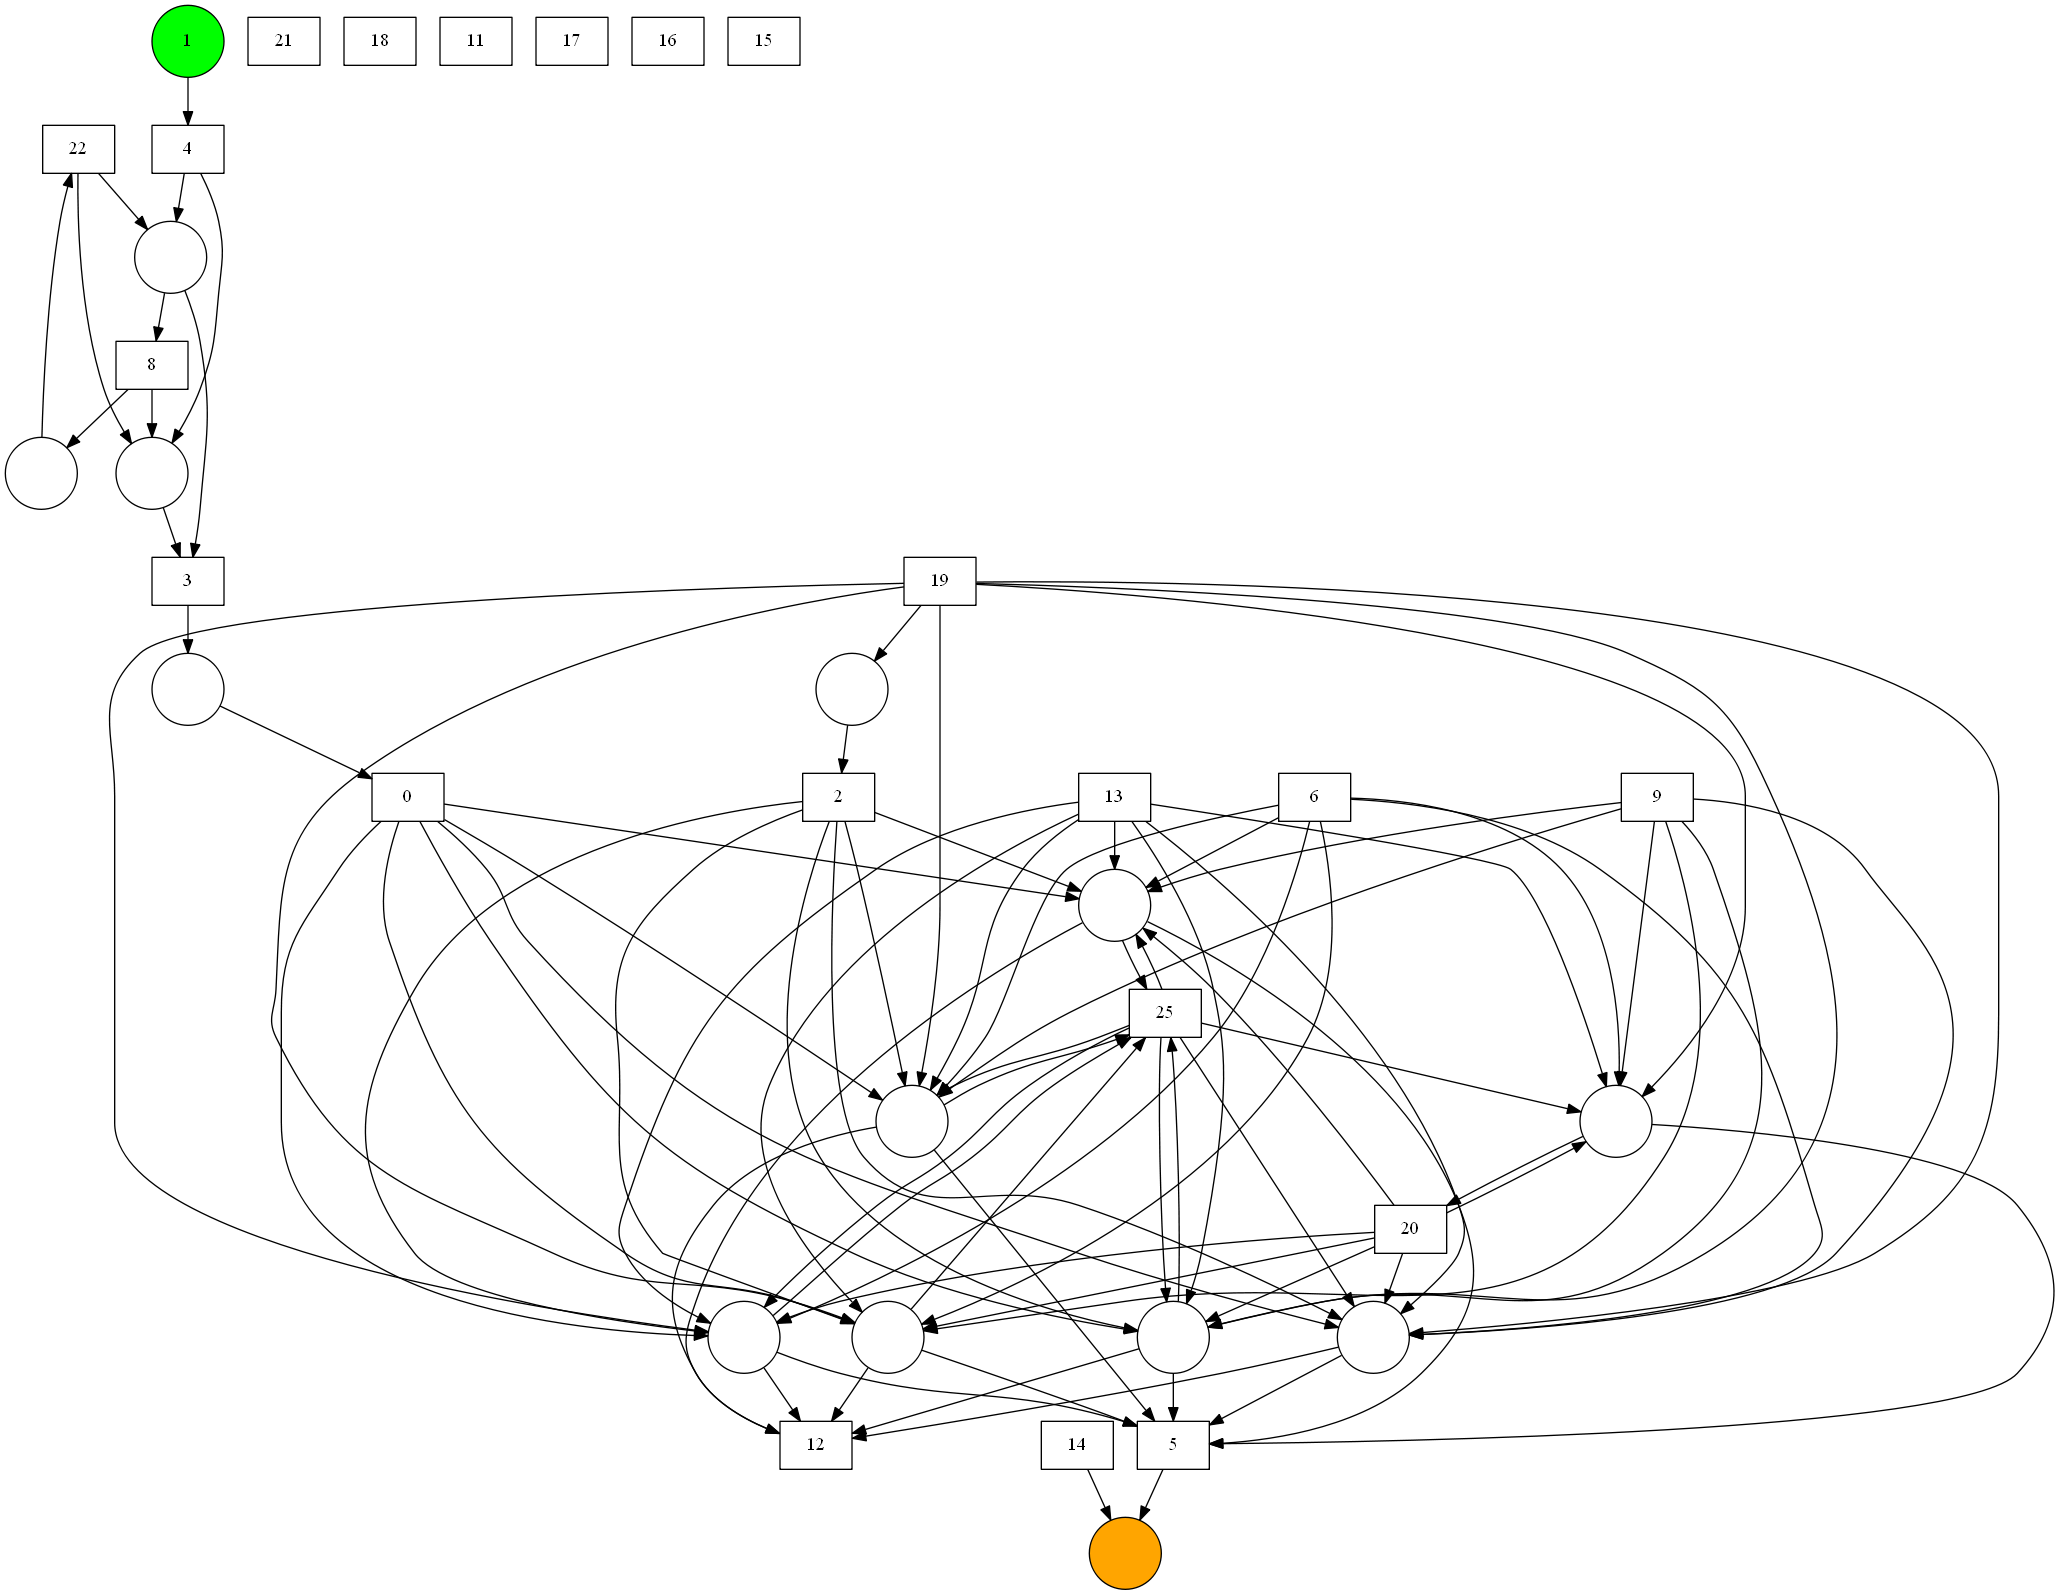

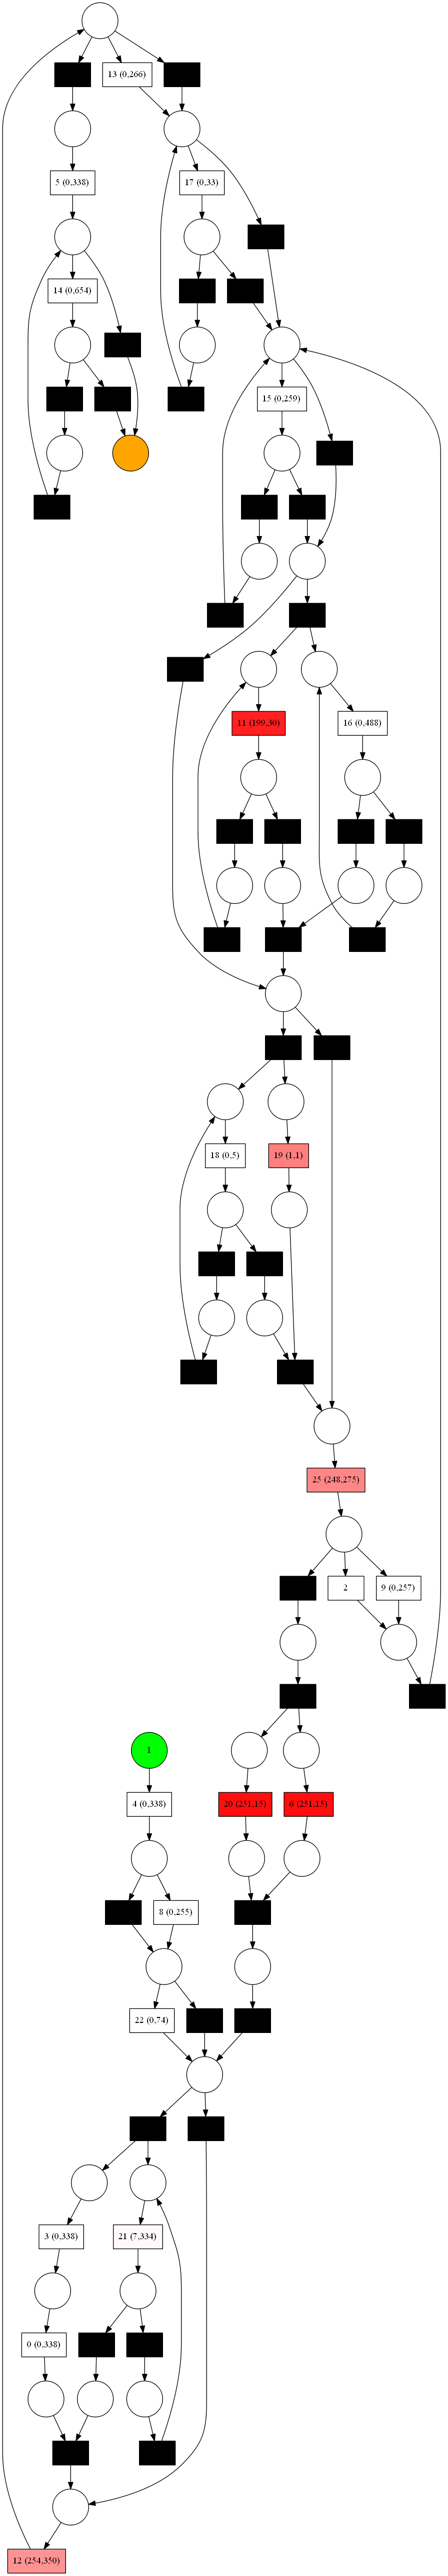

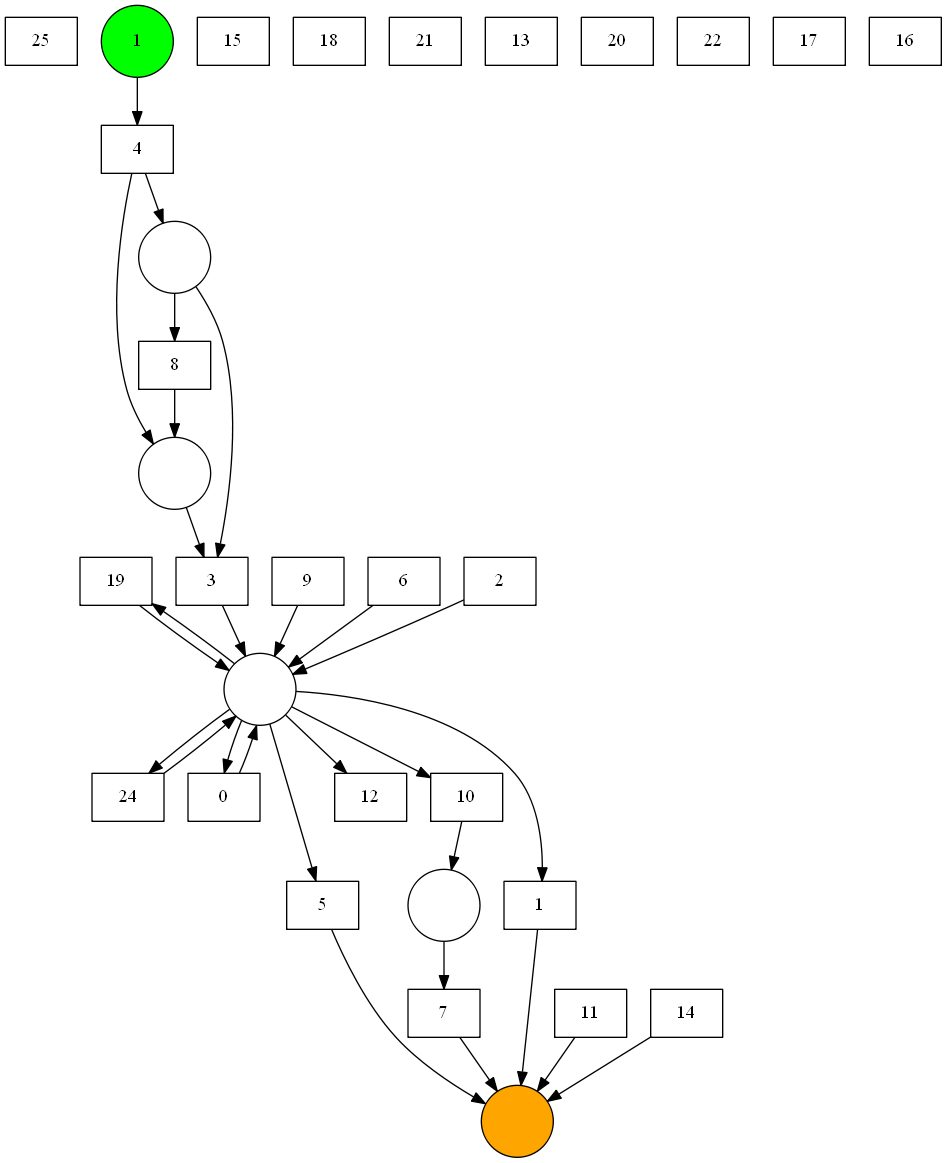

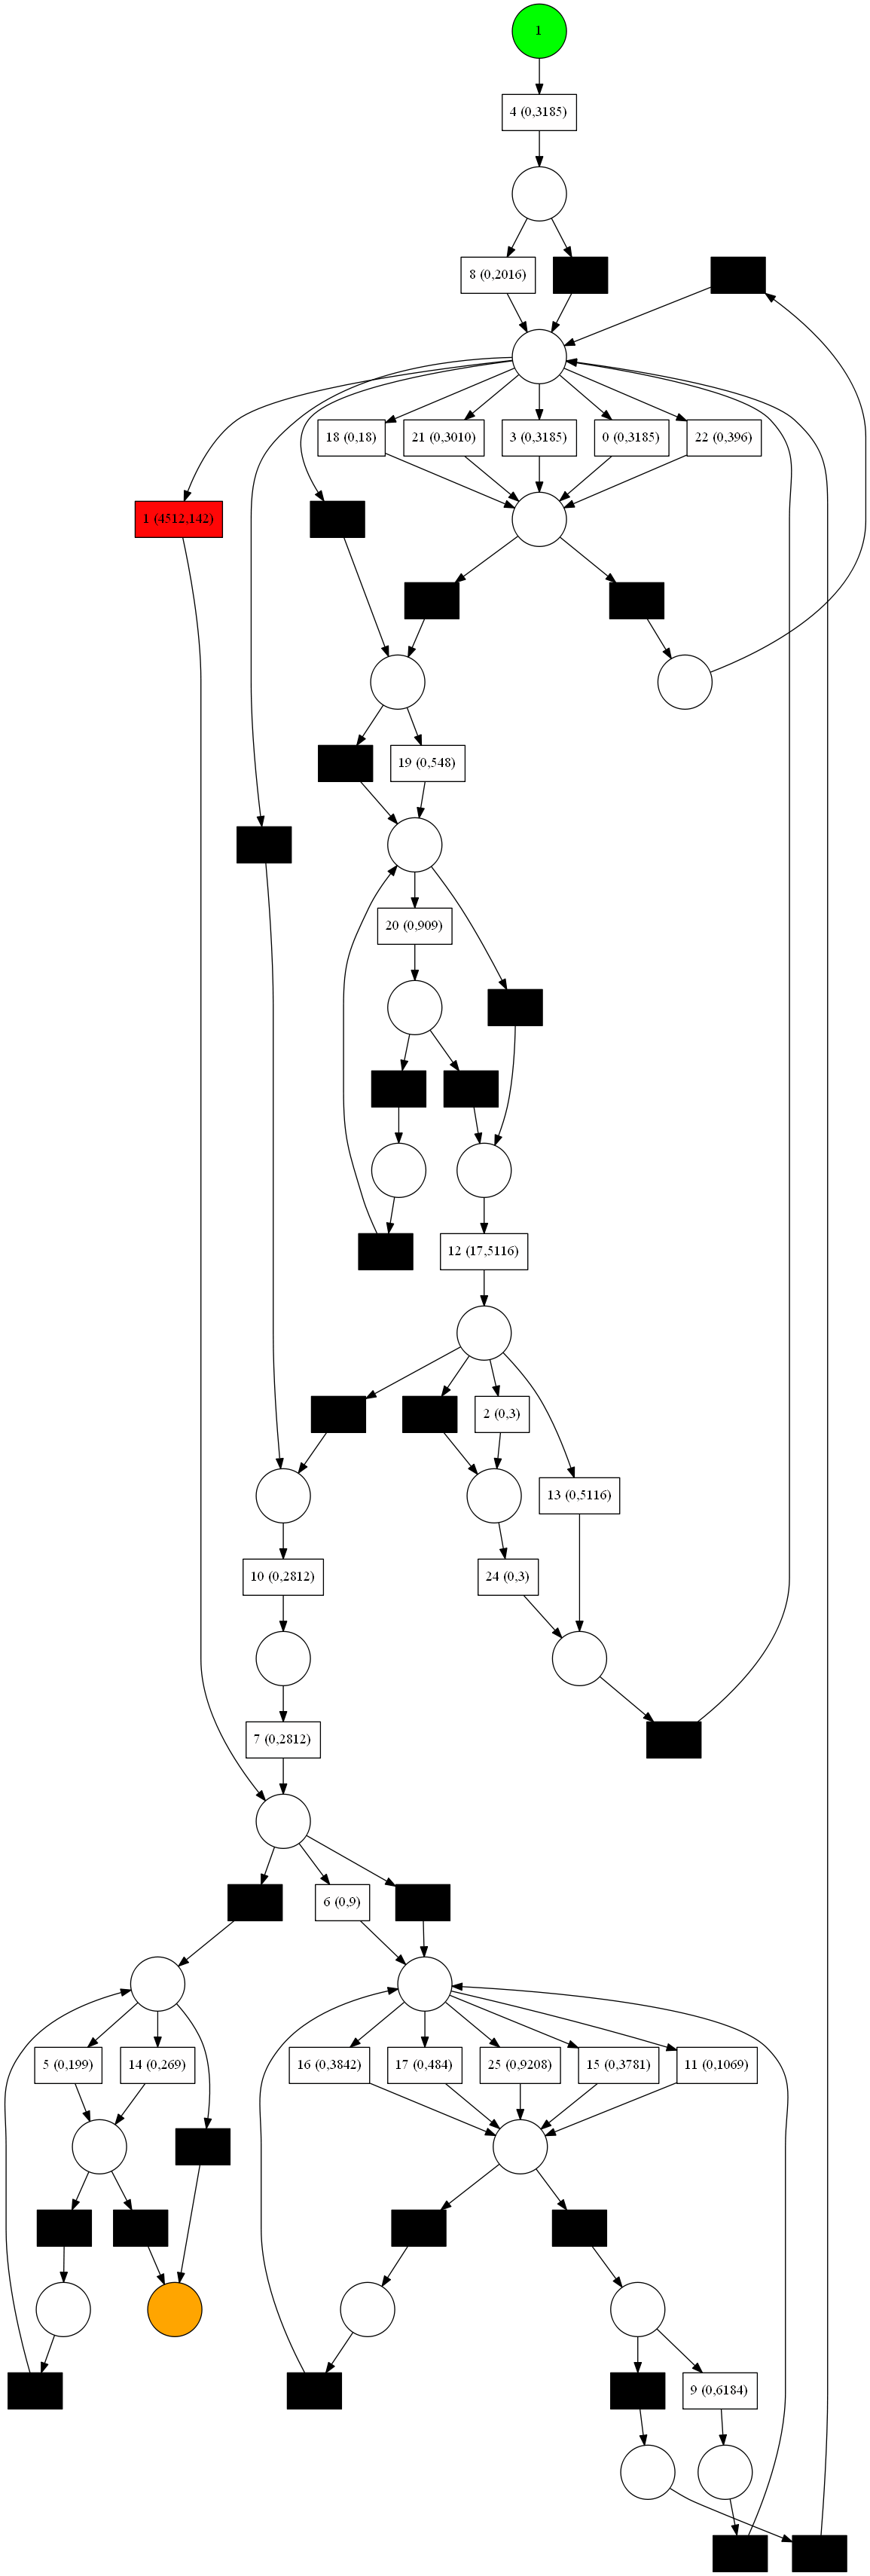

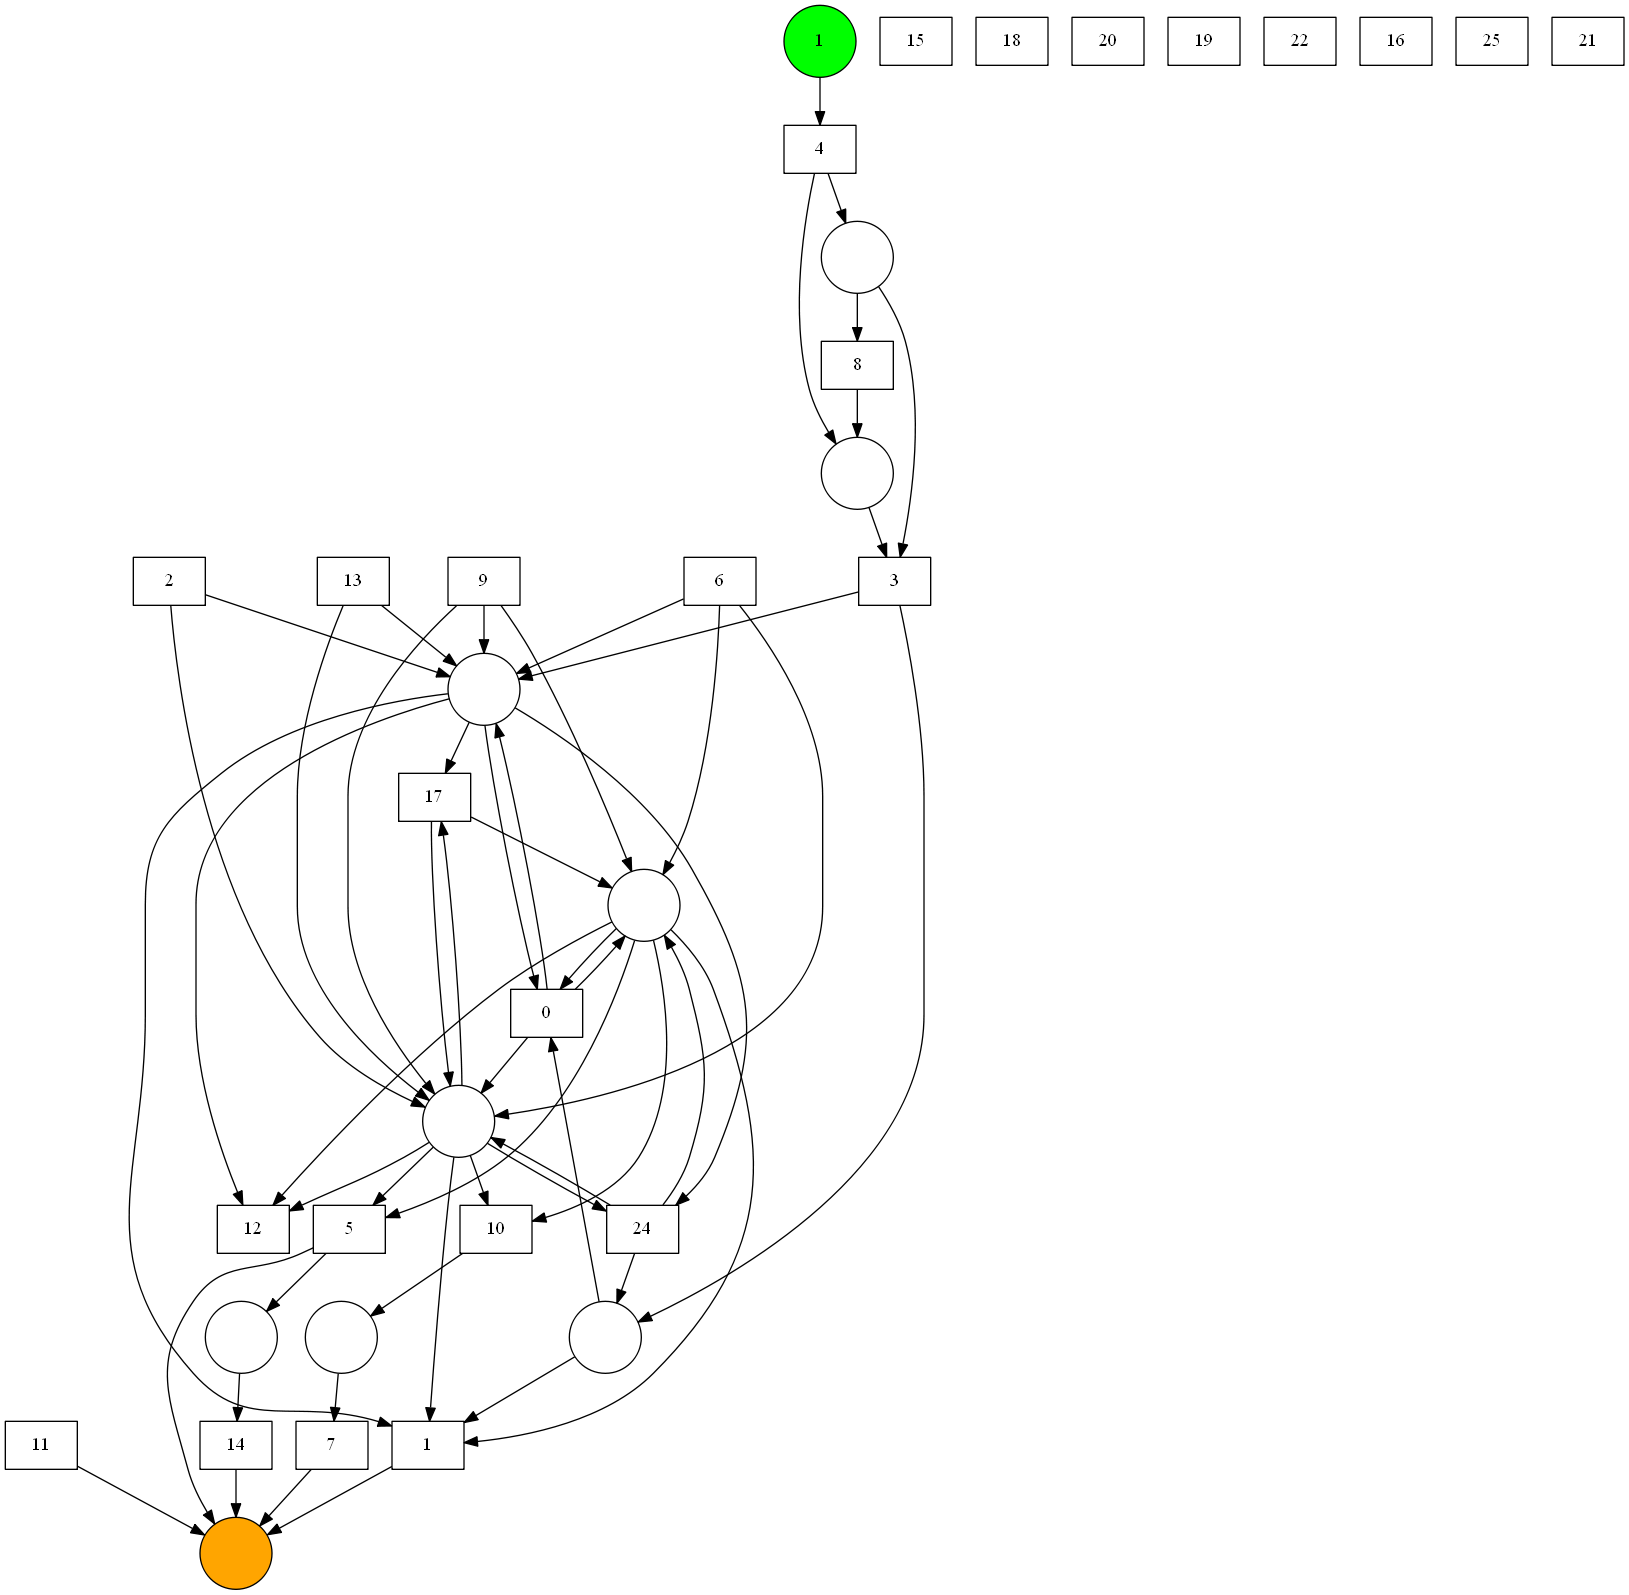

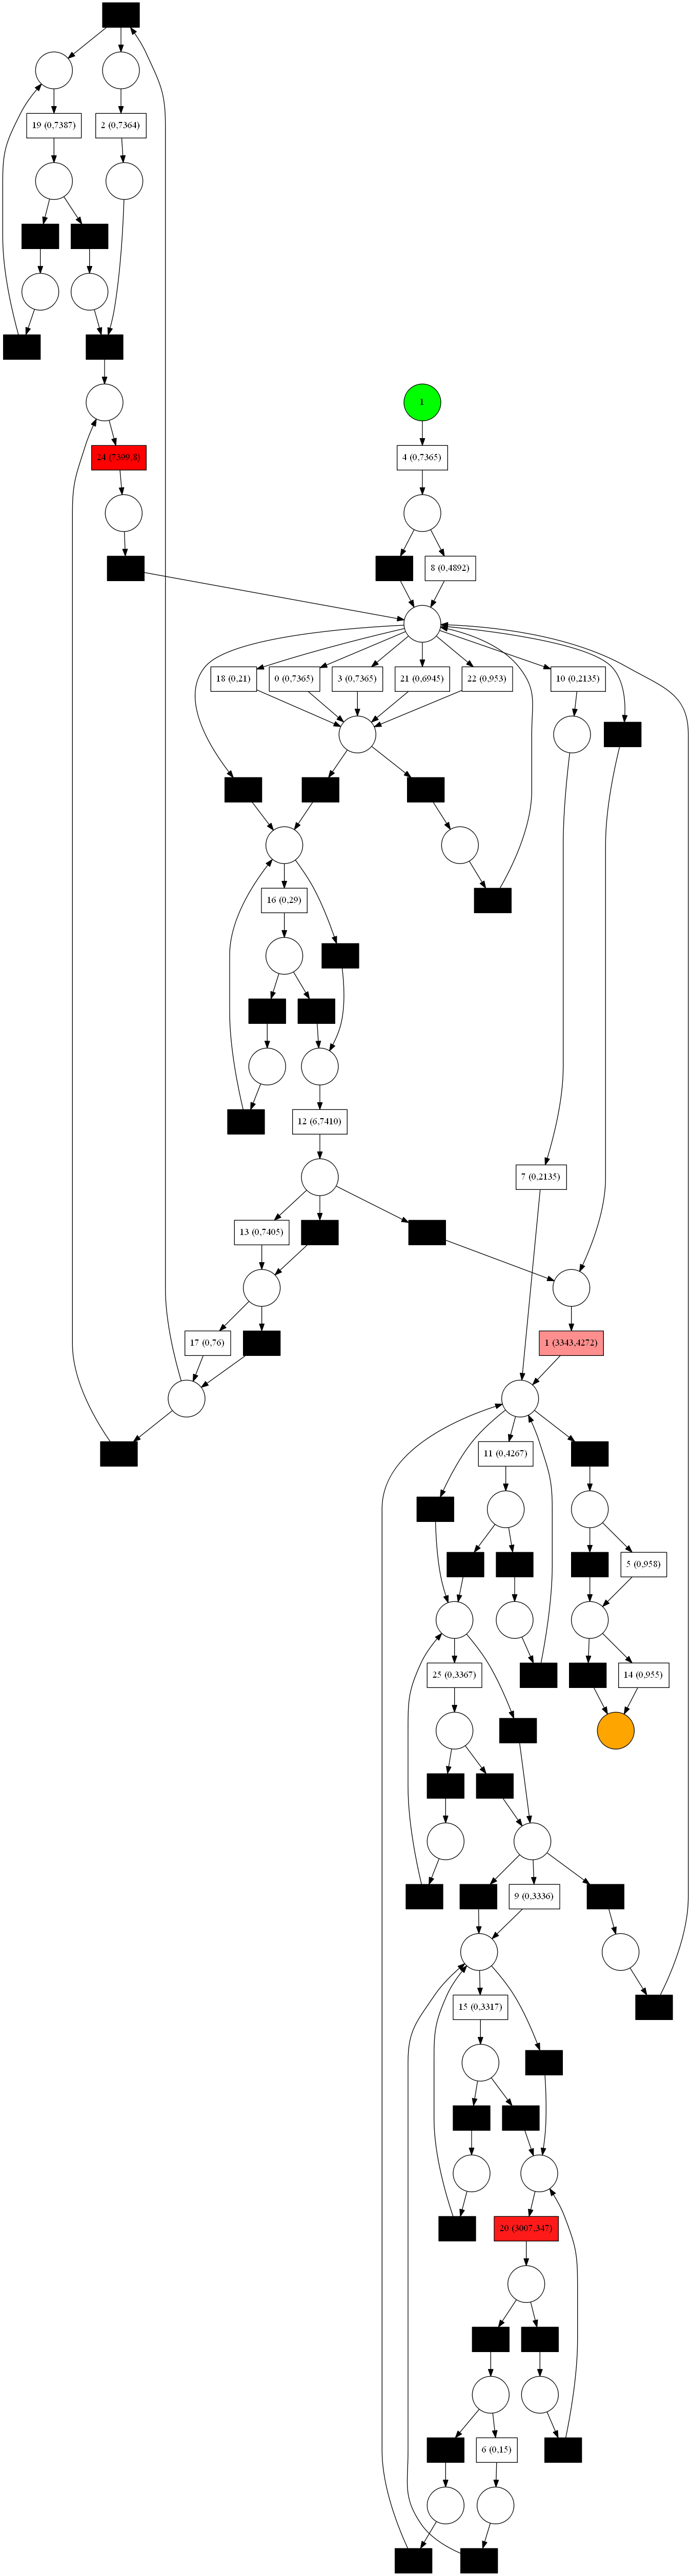

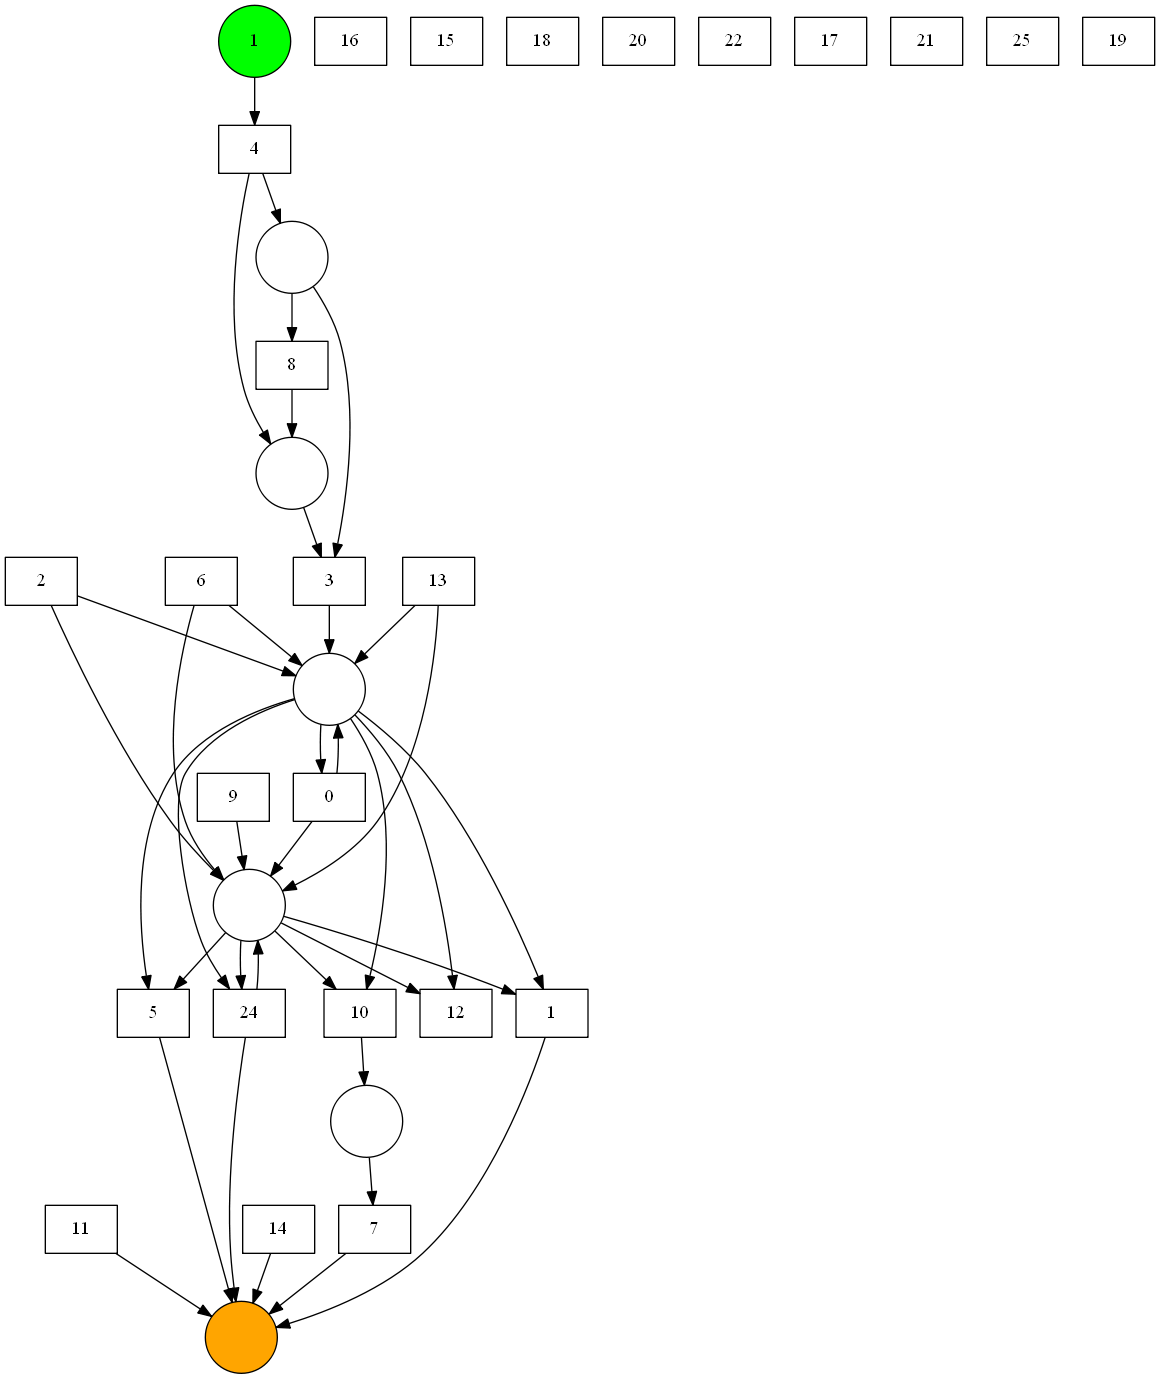

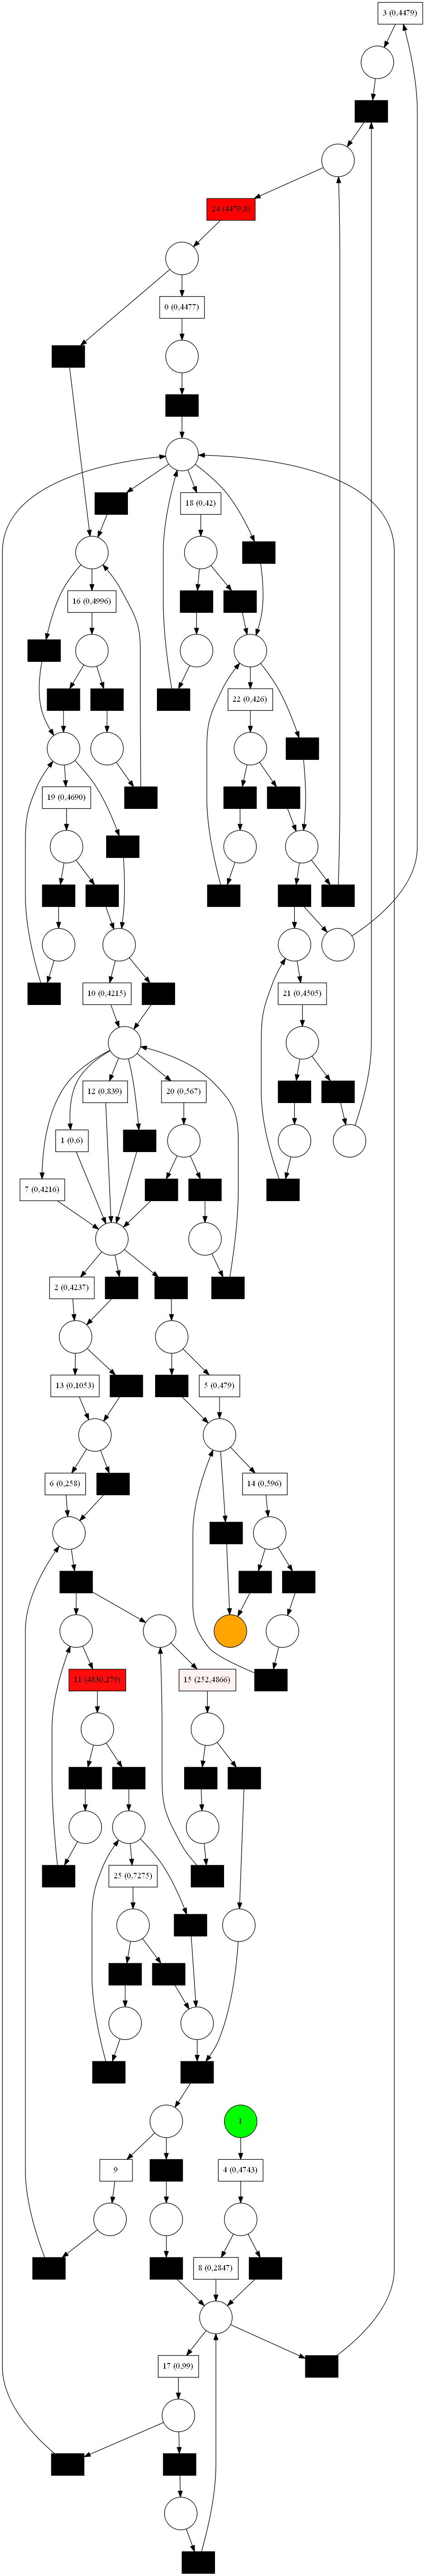

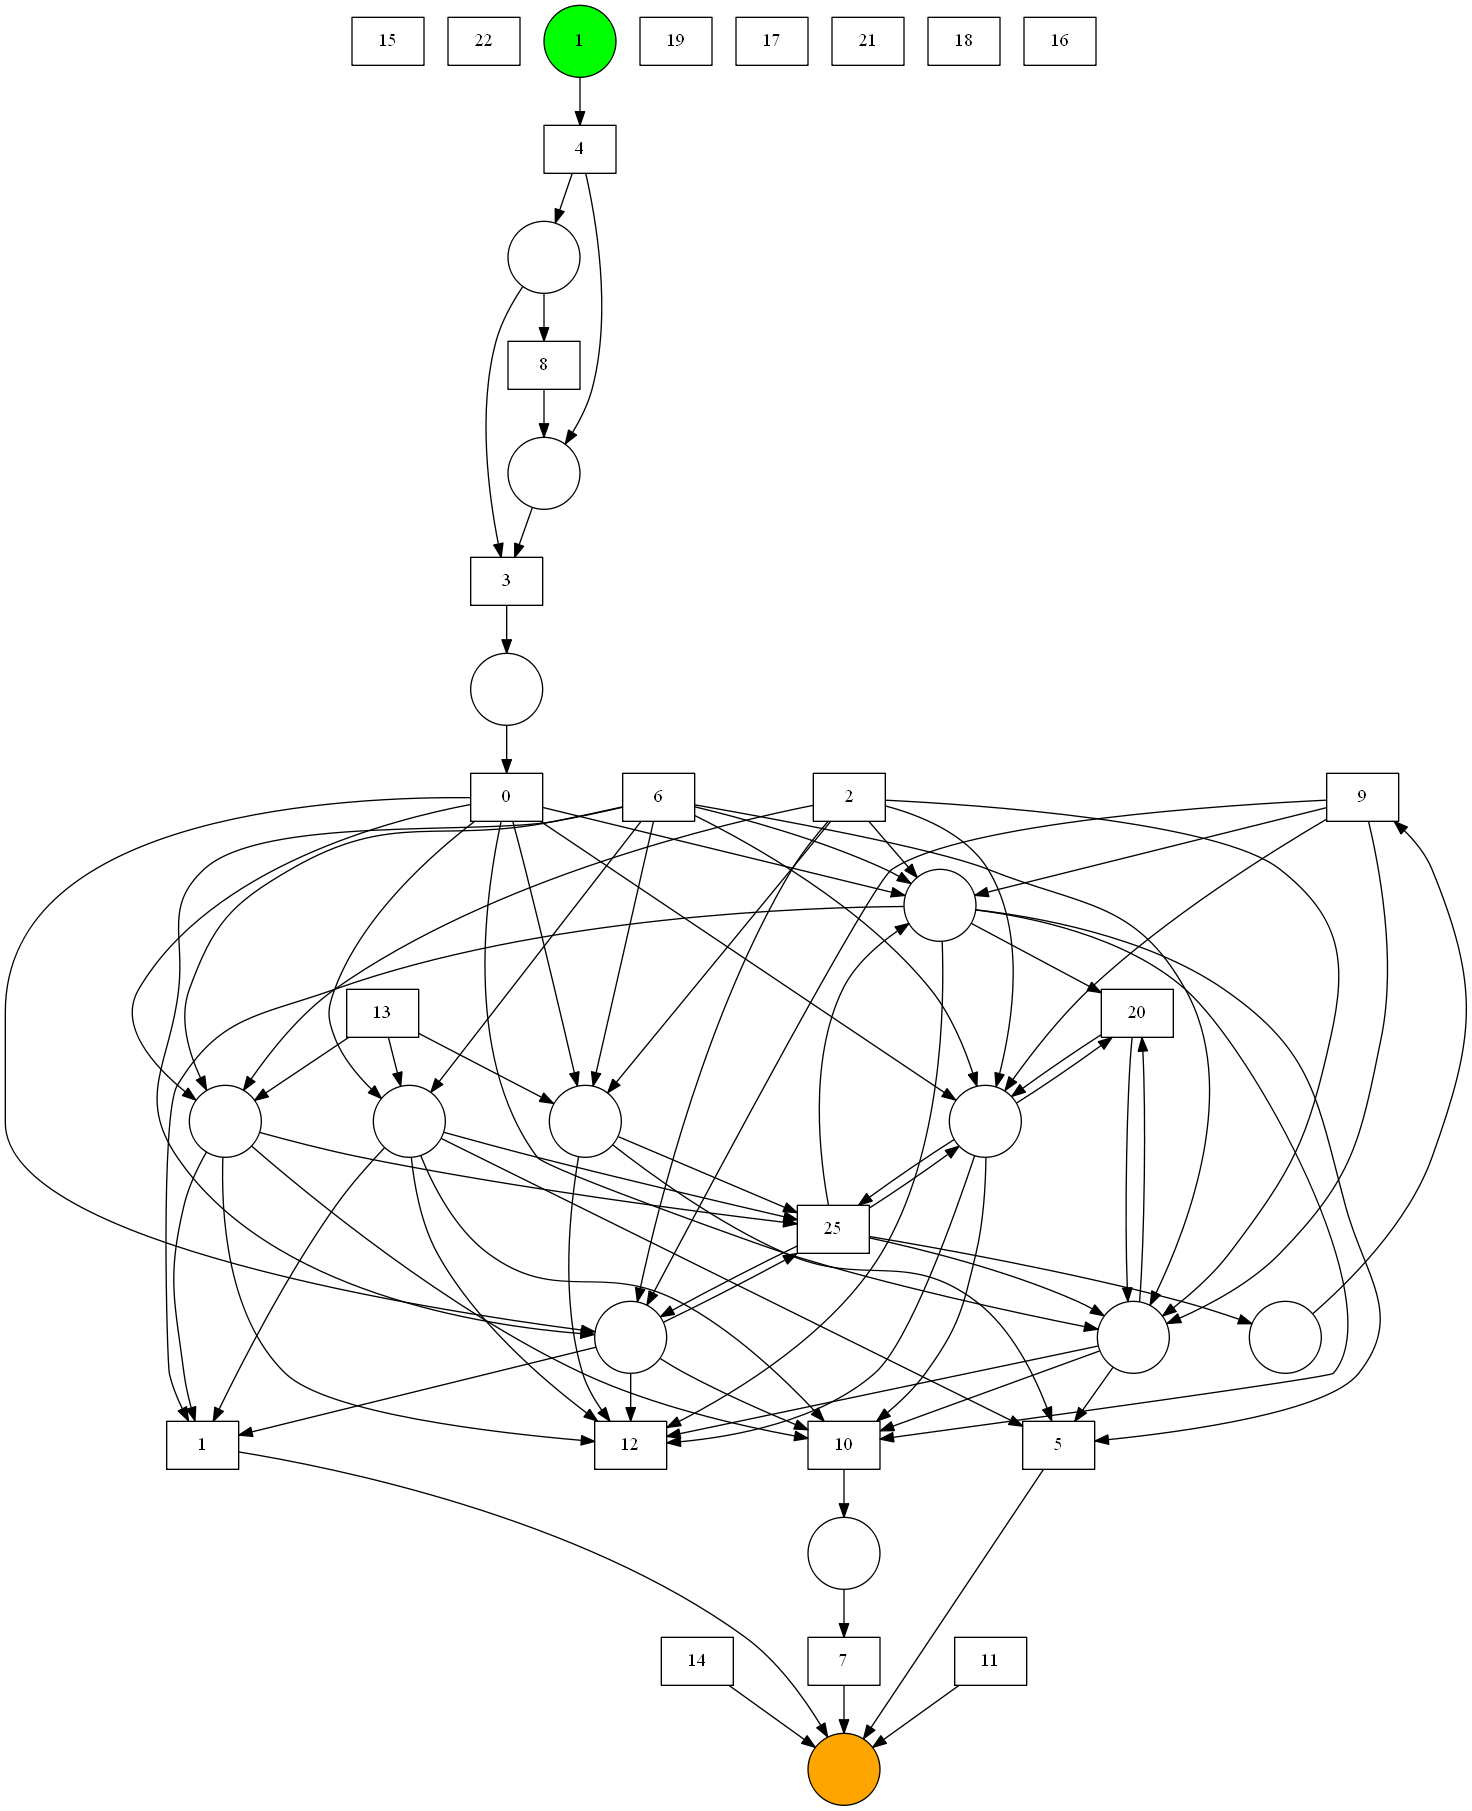

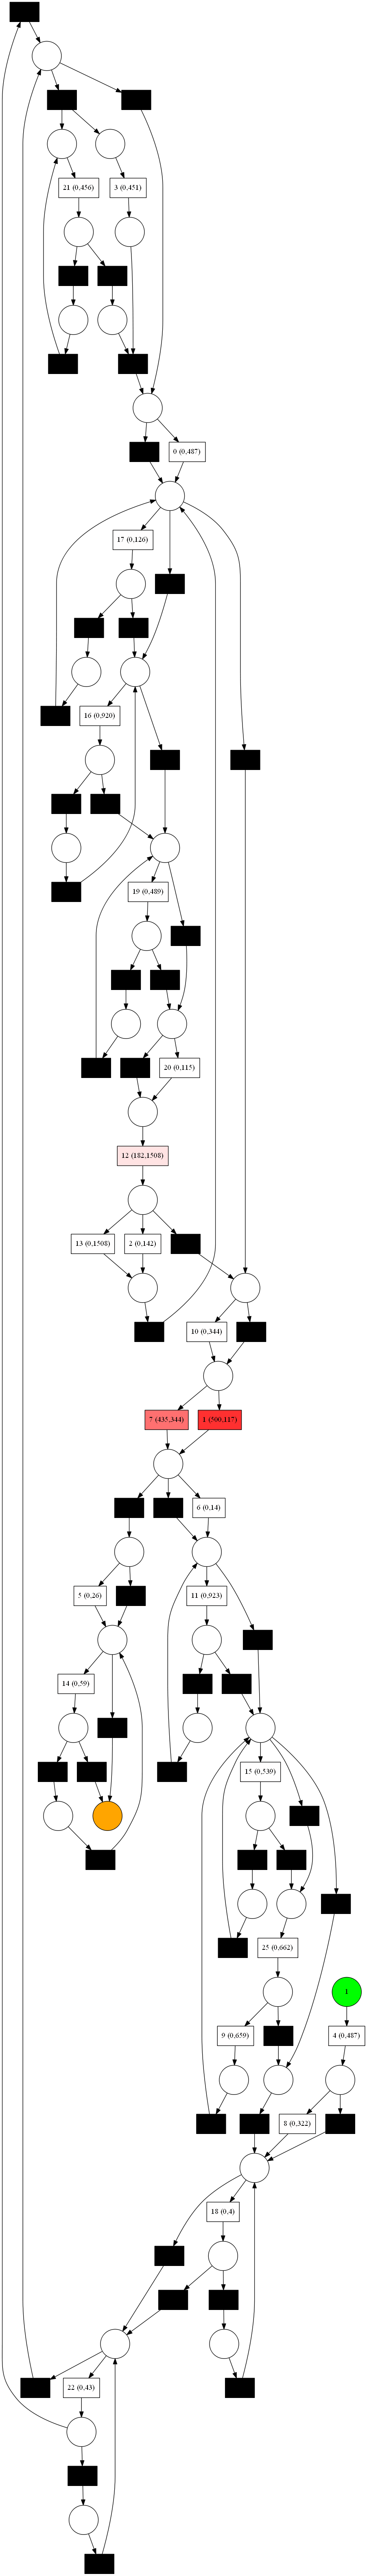

In [4]:
alph_p=[];alph_im=[];alph_fm=[]
indc_p=[];induc_im=[];induc_fm=[]
for i in range(6):
    
    name='q_gram clusters/cluster_'+str(i)+".xes"
    log = xes_importer.import_log(name)
    
    alpha_petri, alpha_initial_marking, alpha_final_marking = alpha_miner.apply(log)
    inductive_petri, inductive_initial_marking, inductive_final_marking = inductive_miner.apply(log)
    
    alph_p.append(alpha_petri);alph_im.append(alpha_initial_marking);alph_fm.append(alpha_final_marking)
    
    indc_p.append(inductive_petri);induc_im.append(inductive_initial_marking);induc_fm.append(inductive_final_marking)
    
    gviz = pn_vis_factory.apply(alpha_petri, alpha_initial_marking, alpha_final_marking,log=log,parameters={"ret_tuple_as_trans_desc": True})
    pn_vis_factory.view(gviz)
    
    gviz = pn_vis_factory.apply(inductive_petri, inductive_initial_marking, inductive_final_marking, log=log,variant='alignments')
    pn_vis_factory.view(gviz)
    

In [13]:
import pickle

In [93]:
with open ('preds.pkl', 'wb') as fp:
     pickle.dump(preds,fp)

In [94]:
with open ('actual.pkl', 'wb') as fp:
     pickle.dump(actual,fp)

In [14]:
with open ('classifier.pkl', 'rb') as fp:
     clss = pickle.load(fp)

In [272]:
#test_KMeans.groupby(['Case ID']).head(1)[['Case ID']+['lbl']]

In [48]:
test_KMedoide=pd.read_csv('test_KMedoide.csv',sep=";",index_col=[0])

In [15]:
log_test = xes_importer.import_log("q_gram clusters/test.xes")

In [80]:
log_test._list[2].attributes['concept:name']


'Application_1001114274'

In [18]:
clusters_assignment_alph=[]
clusters_assignment_induc=[]

for tr in range(len(log_test)):
    trace=[log_test[tr]]   # trace as a log
    sim_mat_alph=[]
    sim_mat_induc=[]
    for i in range(6):
        fitness_alpha = replay_factory.apply(trace, alph_p[i], alph_im[i], alph_fm[i])
        fitness_inductive = replay_factory.apply(trace, indc_p[i], induc_im[i], induc_fm[i])
        sim_mat_alph.append(fitness_alpha['average_trace_fitness'])
        sim_mat_induc.append(fitness_inductive['average_trace_fitness'])
    clusters_assignment_alph.append(np.argmax(sim_mat_alph))
    clusters_assignment_induc.append(np.argmax(sim_mat_induc))

print('Alpha: ',[(c,clusters_assignment_alph.count(c)) for c in np.unique(clusters_assignment_alph)])
print('inductive: ',[(c,clusters_assignment_induc.count(c)) for c in np.unique(clusters_assignment_induc)])

[(0, 2180), (1, 10), (2, 4), (3, 14), (4, 1225), (5, 2273)]

[(0, 3306), (1, 6), (2, 860), (3, 20), (5, 1514)]

In [50]:
# must sort as xes log
test_KMedoide=test_KMedoide.groupby(['Case ID'],sort=True).apply(lambda x:x.head(70)).droplevel(0)

In [25]:
data_encoder = LastStateEncoder(case_id_col, timestamp_col, cat_cols, numeric_cols, fillna=True)

In [28]:
with open ('d1.pkl', 'rb') as fp:
     d1 = pickle.load(fp)

In [27]:
# encoding all features 
all_encode=data
all_encode=data_encoder.transform(all_encode)
cls_features=all_encode.columns

In [31]:
test_KMedoide=test_KMedoide.drop(['Variant index'],1)

In [39]:
# predicting outcome classes
cols = [case_id_col]+list(['A_Pending']+['A_Cancelled']+['A_Denied'])
# important to sort as xes log
cases_frame=test_KMedoide.groupby(['Case ID']).head(1)
preds = pd.DataFrame(columns=cols)
actual = pd.DataFrame(columns=cols)
for cl in range(6):

    # select cases belonging to given cluster
    cases =list( cases_frame[np.array(clusters_assignment_alph) == cl]['Case ID'])
    if len(cases)>0:
        tmp = test_KMedoide[test_KMedoide[case_id_col].isin (cases)]

        # encode data attributes
        test_encode = data_encoder.transform(tmp)
        missing_columns=[col for col in d1 if col not in cls_features]
        mc=pd.DataFrame(columns=missing_columns)
        test_encode=pd.concat([test_encode,mc],ignore_index=True, sort=False).fillna(0)
        test_encode.fillna(0, inplace=True)
        # make predictions
        new_preds = pd.DataFrame(clss[cl].predict_proba(test_encode.drop([case_id_col, label_col], axis=1)))
        new_preds.columns =clss[cl].classes_
        new_preds[case_id_col] = list(cases)
        #new_preds
        preds = pd.concat([preds, new_preds], axis=0, ignore_index=True,sort=False)
        # extract actual label values
        actuals = pd.get_dummies(test_encode[label_col])
        #print(actuals)
        actuals[case_id_col] = test_encode[case_id_col]
        actual = pd.concat([actual, actuals], axis=0, ignore_index=True,sort=False)
        print(' ',len(new_preds),end='')
    else:
        print(' 0',end='')
print('')
preds.fillna(0, inplace=True)
actual.fillna(0, inplace=True)

  2180  10  4  14  1225  2273


In [89]:
import sklearn.metrics as met
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
th=dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i],th[i] = met.roc_curve(actual[actual.columns.values[i+1]],preds[preds.columns.values[i+1]])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.figure()
    lw = i
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic %r' %actual.columns.values[i+1])
    plt.legend(loc="lower right")
    plt.show()

C:\Users\MSI\Miniconda3\envs\dl-challenge\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## Conformance and alignment

In [1]:
import os
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.algo.discovery.inductive import factory as inductive_miner

#log = xes_importer.import_log(os.path.join("tests", "input_data", "test_prom.xes"))
#log = xes_importer.import_log("test_prom.xes")

net, initial_marking, final_marking = inductive_miner.apply(log)

In [2]:
import pm4py
from pm4py.algo.conformance.alignments import factory as align_factory

alignments = align_factory.apply_log(log, net, initial_marking, final_marking)

In [4]:
log_check = xes_importer.import_log("data/train_1.xes")

In [29]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(alignments, variant="alignments")


# Alpha & Inductive

In [229]:
from pm4py.objects.log.importer.xes import factory as xes_importer
log_check = xes_importer.import_log("data/train_3.xes")

In [230]:
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.algo.discovery.inductive import factory as inductive_miner
alpha_petri, alpha_initial_marking, alpha_final_marking = alpha_miner.apply(log)
inductive_petri, inductive_initial_marking, inductive_final_marking = inductive_miner.apply(log)

# Alignment

In [231]:
#from pm4py.algo.conformance.alignments import factory as align_factory

#log_check = xes_importer.import_log("data/trim.xes")
alignments = align_factory.apply_log(log_check, inductive_petri, inductive_initial_marking, inductive_final_marking)

In [232]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

log_fitness = replay_fitness_factory.evaluate(alignments, variant="alignments")

print(log_fitness)

{'averageFitness': 0.8861703810523306, 'percFitTraces': 5.030181086519114}


# cost function

In [211]:
parameters = {pm4py.algo.conformance.alignments.versions.state_equation_a_star.PARAM_MODEL_COST_FUNCTION: 0,
              pm4py.algo.conformance.alignments.versions.state_equation_a_star.PARAM_SYNC_COST_FUNCTION: 0}


In [215]:
parameters

{'model_cost_function': {O_Sent (online only): 1000,
  A_Cancelled: 1000,
  O_Sent (mail and online): 1000,
  O_Create Offer: 1000,
  A_Accepted: 1000,
  A_Create Application: 1000,
  W_Call incomplete files: 1000,
  A_Submitted: 1000,
  A_Complete: 1000,
  W_Validate application: 1000,
  O_Returned: 1000,
  A_Validating: 1000,
  A_Incomplete: 1000,
  W_Handle leads: 1000,
  A_Concept: 1000,
  O_Refused: 1000,
  O_Created: 1000,
  O_Cancelled: 1000,
  W_Complete application: 1000,
  W_Call after offers: 1000,
  W_Assess potential fraud: 1000,
  A_Denied: 1000},
 'sync_cost_function': {O_Sent (online only): 0,
  A_Cancelled: 0,
  O_Sent (mail and online): 0,
  O_Create Offer: 0,
  A_Accepted: 0,
  A_Create Application: 0,
  W_Call incomplete files: 0,
  A_Submitted: 0,
  A_Complete: 0,
  W_Validate application: 0,
  O_Returned: 0,
  A_Validating: 0,
  A_Incomplete: 0,
  W_Handle leads: 0,
  A_Concept: 0,
  O_Refused: 0,
  O_Created: 0,
  O_Cancelled: 0,
  W_Complete application: 0,
  W_

In [213]:
model_cost_function = dict()
sync_cost_function = dict()
for t in alpha_petri.transitions:
	# if the label is not None, we have a visible transition
	if t.label is not None:
		# associate cost 1000 to each move-on-model associated to visible transitions
		model_cost_function[t] = 1000
		# associate cost 0 to each move-on-log
		sync_cost_function[t] = 0
	else:
		# associate cost 1 to each move-on-model associated to hidden transitions
		model_cost_function[t] = 1

In [214]:
parameters[pm4py.algo.conformance.alignments.versions.state_equation_a_star.PARAM_MODEL_COST_FUNCTION] = model_cost_function
parameters[pm4py.algo.conformance.alignments.versions.state_equation_a_star.PARAM_SYNC_COST_FUNCTION] = sync_cost_function

In [217]:
alignments = align_factory.apply_log(log_check,inductive_petri, inductive_initial_marking, inductive_final_marking, parameters=parameters)

KeyError: A_Incomplete

# fitness

In [242]:
alpha_petri, alpha_initial_marking, alpha_final_marking = alpha_miner.apply([test_log[10]])
inductive_petri, inductive_initial_marking, inductive_final_marking = inductive_miner.apply([test_log[10]])

In [244]:
# token-based replay
from pm4py.evaluation.replay_fitness import factory as replay_factory
fitness_alpha = replay_factory.apply([test_log[1]], alpha_petri, alpha_initial_marking, alpha_final_marking)
fitness_inductive = replay_factory.apply([test_log[1]], inductive_petri, inductive_initial_marking, inductive_final_marking)
print("fitness_alpha=",fitness_alpha)
print("fitness_inductive=",fitness_inductive)

fitness_alpha= {'average_trace_fitness': 0.6666666666666667, 'log_fitness': 0.6666666666666667, 'perc_fit_traces': 0.0}
fitness_inductive= {'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'perc_fit_traces': 100.0}


In [278]:
fitness_alpha['log_fitness']

0.6666666666666667

In [245]:
#alignments-based replay     calculate alignment implicitely
fitness_inductive = replay_factory.apply([test_log[1]],
                                         inductive_petri,
                                         inductive_initial_marking,
                                         inductive_final_marking,
                                         variant="alignments")   #alignments-based replay
print("fitness_inductive=",fitness_inductive)

fitness_inductive= {'averageFitness': 0.8333333333333334, 'percFitTraces': 0.0}


# precision

In [246]:
from pm4py.evaluation.precision import factory as precision_factory

precision_alpha = precision_factory.apply([test_log[1]], alpha_petri, alpha_initial_marking, alpha_final_marking)
precision_inductive = precision_factory.apply([test_log[1]], inductive_petri, inductive_initial_marking, inductive_final_marking)

print("precision_alpha=",precision_alpha)
print("precision_inductive=",precision_inductive)

precision_alpha= 0.0
precision_inductive= 0.17500000000000004


# generalization

In [247]:
from pm4py.evaluation.generalization import factory as generalization_factory

generalization_alpha = generalization_factory.apply([test_log[1]], alpha_petri, alpha_initial_marking, alpha_final_marking)
generalization_inductive = generalization_factory.apply([test_log[1]], inductive_petri, inductive_initial_marking, inductive_final_marking)

print("generalization_alpha=",generalization_alpha)
print("generalization_inductive=",generalization_inductive)

generalization_alpha= 0.23431457505076203
generalization_inductive= 0.1751650526349149


# simplicity

In [248]:
from pm4py.evaluation.simplicity import factory as simplicity_factory

simplicity_alpha = simplicity_factory.apply(alpha_petri)
simplicity_inductive = simplicity_factory.apply(inductive_petri)

print("simplicity_alpha=",simplicity_alpha)
print("simplicity_inductive=",simplicity_inductive)

simplicity_alpha= 0.7142857142857143
simplicity_inductive= 0.5909090909090909


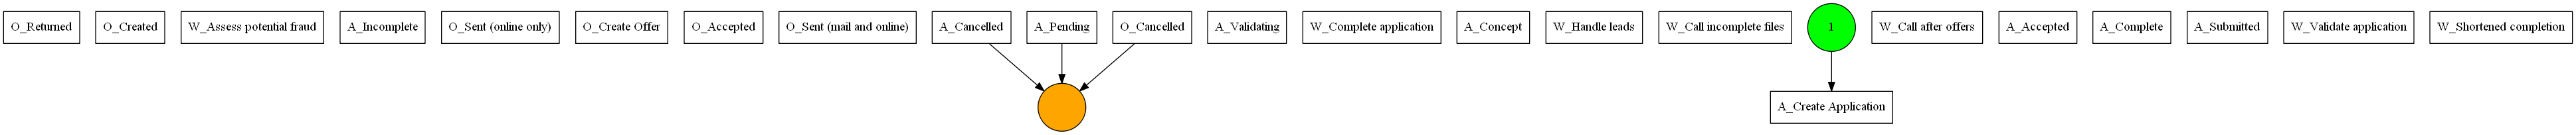

In [234]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(alpha_petri, alpha_initial_marking, alpha_final_marking, log=log,parameters={"ret_tuple_as_trans_desc": True})
pn_vis_factory.view(gviz)

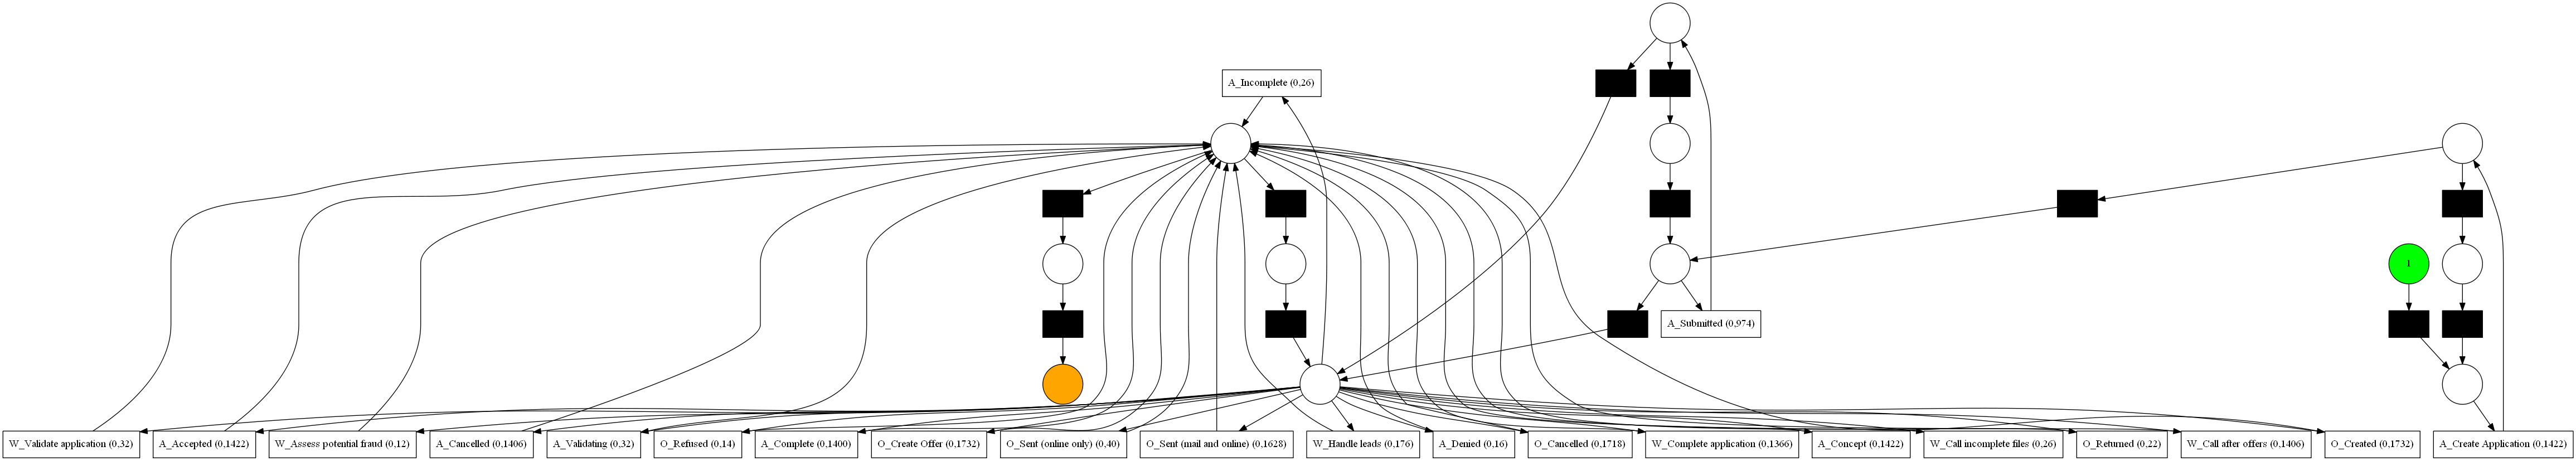

In [24]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(inductive_petri, inductive_initial_marking, inductive_final_marking, log=log,variant='alignments')
pn_vis_factory.view(gviz)

## Prediction through Sklearn

In [138]:
import os
from pm4py.objects.log.importer.xes import factory as xes_importer
log = xes_importer.import_log("data/train_0.xes")

In [119]:
test_log = xes_importer.import_log("data/trim.xes")

In [139]:
from pm4py.algo.prediction import factory as prediction_factory
model = prediction_factory.train(log, variant="elasticnet")

In [140]:
results = prediction_factory.test(model, test_log)
#print("ELASTICNET RESULTS")
#print(results)

## Prediction through Recurrent Neural Networks (Keras)

In [36]:
from pm4py.algo.prediction import factory as prediction_factory
model = prediction_factory.train(log, variant="keras_rnn")

C:\Users\MSI\Miniconda3\envs\ch\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 568 samples, validate on 143 samples
Epoch 1/50
568/568 [==============================] - 5s 9ms/step - loss: 0.8624 - val_loss: 0.8207
Epoch 2/50
568/568 [==============================] - 1s 2ms/step - loss: 0.6302 - val_loss: 0.3733
Epoch 3/50
568/568 [==============================] - 1s 2ms/step - loss: 0.3175 - val_loss: 0.2517
Epoch 4/50
568/568 [==============================] - 1s 2ms/step - loss: 0.2210 - val_loss: 0.1893
Epoch 5/50
568/568 [==============================] - 1s 2ms/step - loss: 0.1739 - val_loss: 0.1617
Epoch 6/50
568/568 [==============================] - 1s 2ms/step - loss: 0.1537 - val_loss: 0.1524
Epoch 7/50
568/568 [==============================] - 1s 2ms/step - loss: 0.1460 - val_loss: 0.1477
Epoch 8/50
568/568 [==============================] - 1s 2ms/step - loss: 0.1436 - val_loss: 0.1473
Epoch 9/50
568/568 [==============================] - 1s 2ms/step - loss: 0.1433 - val_loss: 0.1467
Epoch 10/50
568/568 [==============================] -

In [119]:
test_log = xes_importer.import_log("data/trim.xes")

In [120]:
rnn_results = prediction_factory.test(model, test_log)
#print("KERAS_RNN results")
#print(rnn_results)

In [ ]:
import pandas
rnn_results=pandas.core.series.Series(rnn_results)
type(rnn_results)
rnn_results.index=ex.index

In [114]:
# trim first n activity
#######################

n=5
trim=pd.read_csv('data/train_0.csv',sep=';',index_col=[0])
n_events=trim.groupby(['Case ID'],sort=False).apply(lambda x: x.head(n)).droplevel(0)

n_events.to_csv('data/trim.csv',sep=';')


In [143]:
results=pandas.core.series.Series(results)
type(results)
results.index=ex.index
results

Case ID
Application_1966208034    231331.561143
Application_1111870538    183596.659596
Application_1461440233    183596.659596
Application_857715587     183596.659596
Application_798605556     183596.659596
Application_74089970       68291.419446
Application_1363165385    231331.561143
Application_1386615618    183596.659596
Application_714015178     188895.340193
Application_1793939874    222802.595800
Application_1231200933     68291.419446
Application_448701611     193835.041017
Application_1111090727     68291.419446
Application_1158965741    183596.659596
Application_1793665913    231331.561143
Application_570833369     142818.193146
Application_479369766     193835.041017
Application_787459470     183596.659596
Application_497612234     183596.659596
Application_290531407      68291.419446
Application_495055221      68291.419446
Application_1358464831     68291.419446
Application_1213984554    183596.659596
Application_148281004     183596.659596
Application_268737670     183596

In [141]:
rnn_results

Case ID
Application_1966208034    697766.301850
Application_1111870538    693335.130577
Application_1461440233    693335.130577
Application_857715587     693335.130577
Application_798605556     693335.130577
Application_74089970      640487.740699
Application_1363165385    697766.301850
Application_1386615618    693335.130577
Application_714015178     694083.897293
Application_1793939874    668334.714616
Application_1231200933    640487.740699
Application_448701611     657170.385181
Application_1111090727    640487.740699
Application_1158965741    693335.130577
Application_1793665913    697766.301850
Application_570833369     662676.481599
Application_479369766     657170.385181
Application_787459470     693335.130577
Application_497612234     693335.130577
Application_290531407     640487.740699
Application_495055221     640487.740699
Application_1358464831    640487.740699
Application_1213984554    693335.130577
Application_148281004     693335.130577
Application_268737670     693335

In [51]:
def execution_time(x):#for one case
    t=x['Start Timestamp'][x.index.min()]
    t = time.strptime(t, "%Y/%m/%d %H:%M:%S.%f")
    t2=x['Complete Timestamp'][x.index.max()]
    t2 = time.strptime(t2, "%Y/%m/%d %H:%M:%S.%f")
    exe=datetime.fromtimestamp(time.mktime(t2))-datetime.fromtimestamp(time.mktime(t))
    return (86400 * exe.days + exe.seconds)

In [55]:
from datetime import datetime, timedelta

In [101]:
avg_grouping=trim.groupby(['Case ID'],sort=False)
ex=avg_grouping.apply(lambda x: execution_time(x))
#avg=ex.mean()
        

In [134]:
ex/86400

Case ID
Application_1966208034    31.578831
Application_1111870538     6.615544
Application_1461440233    57.675150
Application_857715587     30.667245
Application_798605556      8.808565
Application_74089970       1.805359
Application_1363165385     5.138866
Application_1386615618     4.999537
Application_714015178     52.742801
Application_1793939874    36.618646
Application_1231200933    49.481667
Application_448701611     31.513519
Application_1111090727    31.484850
Application_1158965741    44.695741
Application_1793665913    43.605451
Application_570833369     12.203843
Application_479369766     41.571447
Application_787459470     40.923912
Application_497612234     32.749803
Application_290531407     31.886979
Application_495055221     32.633009
Application_1358464831    31.480220
Application_1213984554    35.458646
Application_148281004     33.881910
Application_268737670     37.786157
Application_993168875     31.430822
Application_1231253515    35.531933
Application_12526664

In [103]:
#n_events['Case ID']=n_events.index
#n_events.index=range(0,len(n_events))
avg_grouping_n=n_events.groupby(['Case ID'],sort=False)
ex_n=avg_grouping_n.apply(lambda x: execution_time(x))
#avg=ex.mean()
        

In [135]:
ex_n/86400

Case ID
Application_1966208034     0.944745
Application_1111870538     2.541725
Application_1461440233     1.782720
Application_857715587      0.004537
Application_798605556      1.020949
Application_74089970       1.796470
Application_1363165385     1.138194
Application_1386615618     3.622546
Application_714015178     21.073889
Application_1793939874     5.795509
Application_1231200933     1.645301
Application_448701611      0.762049
Application_1111090727     0.742245
Application_1158965741     0.043449
Application_1793665913     1.711262
Application_570833369      1.510961
Application_479369766      0.654479
Application_787459470      0.003877
Application_497612234      1.838102
Application_290531407      1.074039
Application_495055221      1.821505
Application_1358464831     0.744259
Application_1213984554     0.497546
Application_148281004      2.927801
Application_268737670      0.006505
Application_993168875      0.798102
Application_1231253515     0.555567
Application_12526664

In [137]:
rnn_results/86400

Case ID
Application_1966208034    8.075999
Application_1111870538    8.024712
Application_1461440233    8.024712
Application_857715587     8.024712
Application_798605556     8.024712
Application_74089970      7.413053
Application_1363165385    8.075999
Application_1386615618    8.024712
Application_714015178     8.033378
Application_1793939874    7.735355
Application_1231200933    7.413053
Application_448701611     7.606139
Application_1111090727    7.413053
Application_1158965741    8.024712
Application_1793665913    8.075999
Application_570833369     7.669867
Application_479369766     7.606139
Application_787459470     8.024712
Application_497612234     8.024712
Application_290531407     7.413053
Application_495055221     7.413053
Application_1358464831    7.413053
Application_1213984554    8.024712
Application_148281004     8.024712
Application_268737670     8.024712
Application_993168875     8.024712
Application_1231253515    7.670878
Application_1252666486    8.075999
Application_

In [136]:
(ex-ex_n)/86400

Case ID
Application_1966208034    30.634086
Application_1111870538     4.073819
Application_1461440233    55.892431
Application_857715587     30.662708
Application_798605556      7.787616
Application_74089970       0.008889
Application_1363165385     4.000671
Application_1386615618     1.376991
Application_714015178     31.668912
Application_1793939874    30.823137
Application_1231200933    47.836366
Application_448701611     30.751470
Application_1111090727    30.742604
Application_1158965741    44.652292
Application_1793665913    41.894190
Application_570833369     10.692882
Application_479369766     40.916968
Application_787459470     40.920035
Application_497612234     30.911701
Application_290531407     30.812940
Application_495055221     30.811505
Application_1358464831    30.735961
Application_1213984554    34.961100
Application_148281004     30.954109
Application_268737670     37.779653
Application_993168875     30.632720
Application_1231253515    34.976366
Application_12526664

In [144]:
results/86400

Case ID
Application_1966208034    2.677449
Application_1111870538    2.124961
Application_1461440233    2.124961
Application_857715587     2.124961
Application_798605556     2.124961
Application_74089970      0.790410
Application_1363165385    2.677449
Application_1386615618    2.124961
Application_714015178     2.186289
Application_1793939874    2.578734
Application_1231200933    0.790410
Application_448701611     2.243461
Application_1111090727    0.790410
Application_1158965741    2.124961
Application_1793665913    2.677449
Application_570833369     1.652988
Application_479369766     2.243461
Application_787459470     2.124961
Application_497612234     2.124961
Application_290531407     0.790410
Application_495055221     0.790410
Application_1358464831    0.790410
Application_1213984554    2.124961
Application_148281004     2.124961
Application_268737670     2.124961
Application_993168875     2.124961
Application_1231253515    2.099553
Application_1252666486    2.677449
Application_